## Music Genere Classification

##### Libraries

In [1]:
# --- Audio processing ---
import librosa                   # For audio feature extraction (MFCC, etc.)
import librosa.display           # To visualize audio waveforms and spectrograms
import soundfile as sf           # To read .au/.wav audio files (used by librosa)

# --- Data handling ---
import numpy as np               # For numerical operations (arrays, stats)
import pandas as pd              # For structured data handling (DataFrames)
import os                        # For file/directory operations
import glob                      # For pattern matching file paths

# --- Machine Learning ---
from sklearn.model_selection import train_test_split        # Split data
from sklearn.preprocessing import StandardScaler            # Normalize features
from sklearn.ensemble import RandomForestClassifier, VotingClassifier  # ML models
from sklearn.linear_model import LogisticRegression         # ML model
from sklearn.neighbors import KNeighborsClassifier          # ML model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation
from sklearn.pipeline import Pipeline                       # Combine steps into a single ML pipeline

# --- Save/Load model ---
import joblib                     # To save and load trained models

# --- Visualization ---
import matplotlib.pyplot as plt   # Plotting graphs and charts
import seaborn as sns             # Prettier visualizations (confusion matrix, etc.)

##### Uploading Audio Files

In [2]:
#ziping the files
!zip -r /content/genres.zip /content/genres

	zip warning: name not matched: /content/genres

zip error: Nothing to do! (try: zip -r /content/genres.zip . -i /content/genres)


In [3]:
# Upload the zipped file
from google.colab import files
uploaded = files.upload()

Saving genres.zip to genres.zip


In [4]:
# after uploading
# Unzip it
import zipfile
import os

with zipfile.ZipFile("genres.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

# Now your files are at: /content/genres

##### Extracting The Files

In [5]:
# List the extracted files and folders
print("Extracted files/folders:")
print(os.listdir("/content/"))

# Example check: list audio genres
audio_path = "/content/genres_original"
if os.path.exists(audio_path):
    print("Audio genres found:", os.listdir(audio_path))
else:
    print("'genres_original' folder not found")

Extracted files/folders:
['.config', 'genres.zip', 'Data', 'sample_data']
'genres_original' folder not found


In [8]:
#check directories
# List the files/folders at the root after unzip
print("Root directory contents:")
print(os.listdir("/content/"))

Root directory contents:
['.config', 'genres.zip', 'Data', 'sample_data']


In [9]:
#Check the data folder

print("Contents of /content/Data:")
print(os.listdir("/content/Data"))

Contents of /content/Data:
['genres_original', 'features_3_sec.csv', 'images_original', 'features_30_sec.csv']


In [11]:
# add libs: os,glob, numpy, pandas, librosa, soundfile

# Define path to audio files
audio_dir = "/content/Data/genres_original"

# Check what genres are available
genres = os.listdir(audio_dir)
print("Genres found:", genres)

Genres found: ['hiphop', 'pop', 'metal', 'blues', 'disco', 'country', 'classical', 'reggae', 'jazz', 'rock']


##### Audio PreProcessing

In [12]:
# Extracting features from the Audio
# STEP 2.2: Define a function to extract MFCC features from an audio file

def extract_features(file_path, genre, n_mfcc=20):
    """
    Extracts MFCC features from a 30-second audio file.

    Args:
        file_path (str): Path to the audio file
        genre (str): Genre label (used as target)
        n_mfcc (int): Number of MFCCs to extract

    Returns:
        list: MFCC values + genre + filepath, or None if an error occurs
    """
    try:
        # Load the first 30 seconds of the audio file
        y, sr = librosa.load(file_path, duration=30)

        # Compute MFCCs (Mel-frequency cepstral coefficients)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        # Average the MFCCs across the time axis to get a fixed-length feature vector
        mfcc_scaled = np.mean(mfcc.T, axis=0)

        # Return the MFCC values with genre label and file path
        return [*mfcc_scaled, genre, file_path]

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [30]:
# import glob

# This list will hold the extracted feature vectors for all audio files
data = []

# Loop through each genre (folder name) found in genres_original
for genre in genres:
    # Create the full path to the current genre's folder
    genre_path = os.path.join(audio_dir, genre)

    # If it's not a directory (safety check), skip it
    if not os.path.isdir(genre_path):
        continue

    print(f"Looking into genre: {genre}")

    # List all .wav files in this genre folder
    filepaths = glob.glob(os.path.join(genre_path, "*.wav"))
    print(f"Found {len(filepaths)} audio files.")

    # Loop through each audio file in this genre
    for filepath in filepaths:
        print(f"Processing: {os.path.basename(filepath)}")

        # Call the function to extract MFCC features from the file
        features = extract_features(filepath, genre)

        # If feature extraction was successful, add to the dataset
        if features:
            data.append(features)
        else:
            print(f"Skipped: {os.path.basename(filepath)} due to an error.")

# Final summary after loop ends
print("Feature extraction complete.")
print("Total songs processed:", len(data))

# Optional: View one sample entry to check what the output looks like
if data:
    print("Sample extracted features:", data[0])
else:
    print("No data extracted. Please check the file format or path.")


Looking into genre: hiphop
Found 100 audio files.
Processing: hiphop.00091.wav
Processing: hiphop.00007.wav
Processing: hiphop.00088.wav
Processing: hiphop.00053.wav
Processing: hiphop.00052.wav
Processing: hiphop.00080.wav
Processing: hiphop.00008.wav
Processing: hiphop.00072.wav
Processing: hiphop.00094.wav
Processing: hiphop.00030.wav
Processing: hiphop.00004.wav
Processing: hiphop.00009.wav
Processing: hiphop.00024.wav
Processing: hiphop.00003.wav
Processing: hiphop.00019.wav
Processing: hiphop.00082.wav
Processing: hiphop.00087.wav
Processing: hiphop.00060.wav
Processing: hiphop.00014.wav
Processing: hiphop.00010.wav
Processing: hiphop.00066.wav
Processing: hiphop.00064.wav
Processing: hiphop.00048.wav
Processing: hiphop.00059.wav
Processing: hiphop.00021.wav
Processing: hiphop.00044.wav
Processing: hiphop.00032.wav
Processing: hiphop.00002.wav
Processing: hiphop.00005.wav
Processing: hiphop.00070.wav
Processing: hiphop.00093.wav
Processing: hiphop.00026.wav
Processing: hiphop.000

/tmp/ipython-input-22-1512338117.py:18: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=30)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing /content/Data/genres_original/jazz/jazz.00054.wav: 
Skipped: jazz.00054.wav due to an error.
Processing: jazz.00017.wav
Processing: jazz.00081.wav
Processing: jazz.00000.wav
Processing: jazz.00029.wav
Processing: jazz.00001.wav
Processing: jazz.00095.wav
Processing: jazz.00098.wav
Processing: jazz.00027.wav
Processing: jazz.00092.wav
Processing: jazz.00074.wav
Processing: jazz.00082.wav
Processing: jazz.00012.wav
Processing: jazz.00040.wav
Processing: jazz.00089.wav
Processing: jazz.00077.wav
Processing: jazz.00010.wav
Processing: jazz.00016.wav
Processing: jazz.00065.wav
Processing: jazz.00013.wav
Processing: jazz.00062.wav
Processing: jazz.00093.wav
Processing: jazz.00094.wav
Processing: jazz.00051.wav
Processing: jazz.00075.wav
Processing: jazz.00080.wav
Processing: jazz.00078.wav
Processing: jazz.00055.wav
Processing: jazz.00006.wav
Processing: jazz.00024.wav
Processing: jazz.00086.wav
Processing: jazz.00039.wav
Processing: jazz.00091.wav
Processing: jazz.00014.wav

##### Dataframe the Features

In [36]:
import pandas as pd

# Create column names for MFCCs
mfcc_columns = [f"mfcc{i+1}" for i in range(20)]  # mfcc1 to mfcc20

# Add two more columns: genre and filepath (from the extract_features function)
all_columns = mfcc_columns + ["genre", "filepath"]

# Create a DataFrame using the data list and column names
df = pd.DataFrame(data, columns=all_columns)

# Display first 5 rows to verify structure
print("Preview of the extracted feature DataFrame:")
print(df.head())

# Save the DataFrame to a CSV file for reuse
df.to_csv("gtzan_mfcc_features.csv", index=False)

print("\n CSV saved successfully as 'gtzan_mfcc_features.csv'.")
# print(" Ready to move to ML model training.")

Preview of the extracted feature DataFrame:
        mfcc1       mfcc2      mfcc3      mfcc4      mfcc5      mfcc6  \
0 -105.569511   76.674919 -24.774305  55.198994  -8.257657  28.899265   
1  -58.451878  103.050156  -7.215405  44.881866  -8.616438  12.345843   
2  -89.866783   79.763344 -25.737309  47.726387 -10.019151  31.556944   
3 -144.977814   66.671532  44.280052  22.528505   6.521359   8.850330   
4 -146.516937   81.558525  31.962297  22.430374   5.098355  13.628087   

       mfcc7      mfcc8      mfcc9     mfcc10  ...     mfcc13    mfcc14  \
0 -15.747581  26.304575  -8.491440  20.454641  ...  -6.566314  9.869241   
1 -13.746115  19.974220 -13.128944  17.136246  ...  -0.462768  6.928035   
2 -22.197519  26.661226 -10.976784  18.823181  ... -10.038895  8.900903   
3  11.895541   5.837181   3.043674   6.451863  ...   3.830938  3.720097   
4   6.495130   8.408916   4.438316   5.010662  ...   4.526802  3.852768   

     mfcc15    mfcc16    mfcc17    mfcc18    mfcc19    mfcc20   ge

##### Scaling the dataset

In [37]:
# Load the feature dataset (if not already in memory)
df = pd.read_csv("gtzan_mfcc_features.csv")

# Drop 'filepath' since it's not useful for classification
df = df.drop("filepath", axis=1)

# Separate features (X) and target labels (y)
X = df.drop("genre", axis=1)  # MFCC features
y = df["genre"]               # Genre label

# Encode string labels into integers (e.g., 'pop' → 1, 'rock' → 2, etc.)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Show mapping from genre names to numbers
print("Genre label mapping:")
for genre, code in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{genre} → {code}")

# Split into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale the features to standardize (mean = 0, std = 1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Data is now ready for model training!")
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Genre label mapping:
blues → 0
classical → 1
country → 2
disco → 3
hiphop → 4
jazz → 5
metal → 6
pop → 7
reggae → 8
rock → 9

 Data is now ready for model training!
Training samples: 799, Test samples: 200


##### Training the model

In [38]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"\n Logistic Regression Accuracy: {acc_lr:.2f}")

# Train K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {acc_knn:.2f}")

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.2f}")

# Ensemble: Voting Classifier (majority voting from all 3 models)
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('knn', knn), ('rf', rf)],
    voting='hard'
)
voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)
acc_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {acc_voting:.2f}")



 Logistic Regression Accuracy: 0.58
KNN Accuracy: 0.60
Random Forest Accuracy: 0.61
Voting Classifier Accuracy: 0.63


##### Evalutaion

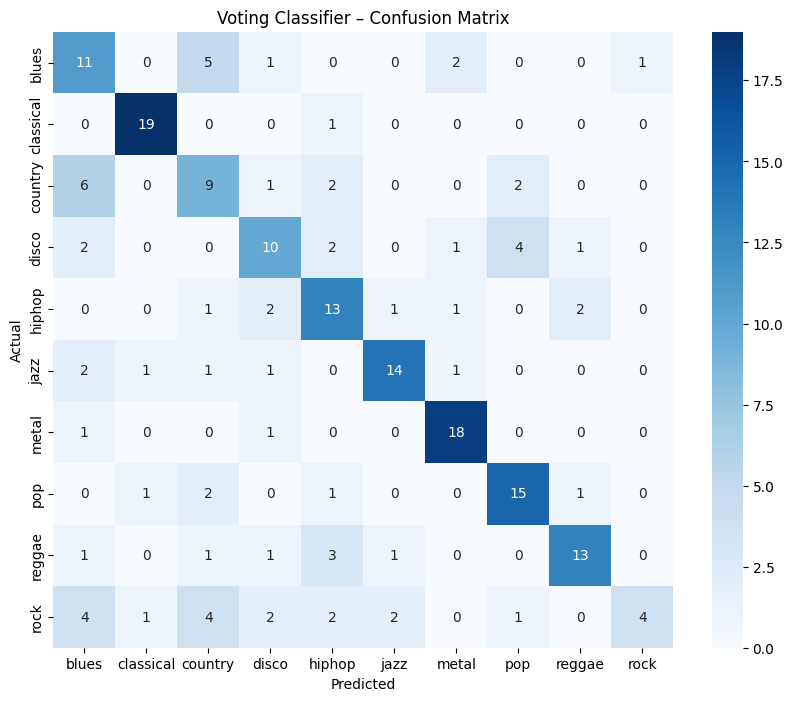


Classification Report (Voting Classifier):
              precision    recall  f1-score   support

       blues       0.41      0.55      0.47        20
   classical       0.86      0.95      0.90        20
     country       0.39      0.45      0.42        20
       disco       0.53      0.50      0.51        20
      hiphop       0.54      0.65      0.59        20
        jazz       0.78      0.70      0.74        20
       metal       0.78      0.90      0.84        20
         pop       0.68      0.75      0.71        20
      reggae       0.76      0.65      0.70        20
        rock       0.80      0.20      0.32        20

    accuracy                           0.63       200
   macro avg       0.65      0.63      0.62       200
weighted avg       0.65      0.63      0.62       200



In [39]:
# Choose which model's predictions to evaluate deeply (here using VotingClassifier)
model_name = "Voting Classifier"
y_pred = y_pred_voting

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"{model_name} – Confusion Matrix")
plt.show()

# Classification Report
print(f"\nClassification Report ({model_name}):")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

##### Saving and loading the model

In [63]:
import joblib

# Load the saved model
model = joblib.load("music_genre_classifier.pkl")

# Try to access feature names (if stored with pipeline or manual tracking)
if hasattr(model, 'feature_names_in_'):
    print("Model was trained with these features:")
    print(model.feature_names_in_)
else:
    print("No direct feature name info found. You may need to recall the list manually.")


No direct feature name info found. You may need to recall the list manually.


In [69]:
# Giving data to only worked with this features as the Logistic model is also trained on few features and csv's contains more than that
selected_features = [
    'chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean',
    'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_mean',
    'harmony_mean', 'perceptr_mean', 'tempo',
    'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean', 'mfcc4_mean', 'mfcc5_mean',
    'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean',
    'mfcc11_mean'
]

##### Predecting for CSV files. (Features_30_sec.csv) 

In [66]:
# Load features CSV
df = pd.read_csv("/content/Data/features_30_sec.csv")

# Remove non-feature columns (label, filename)
X = df[selected_features]

# Scale and predict
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sample_row = X_scaled[10].reshape(1, -1)
predicted_label = model.predict(sample_row)

print("Predicted genre:", predicted_label[0])


Predicted genre: 1
